## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-1, 1e-3, 1e-5, 1e-9]

In [7]:
results = {}
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0719 20:42:34.258075 37356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 20:42:34.260068 37356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 20:42:34.426625 37356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 20:42:34.429614 37356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 20:42:34.441581 37356 

Experiment with Regulizer = 0.100000


W0719 20:42:34.723827 37356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0719 20:42:35.283333 37356 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 385us/step - loss: 79.7854 - acc: 0.2324 - val_loss: 32.4849 - val_acc: 0.2805
Epoch 2/50
50000/50000 [==============================] - 17s 347us/step - loss: 16.8753 - acc: 0.2590 - val_loss: 7.7777 - val_acc: 0.2398
Epoch 3/50
50000/50000 [==============================] - 19s 378us/step - loss: 4.9333 - acc: 0.2189 - val_loss: 3.2711 - val_acc: 0.204176 - acc:
Epoch 4/50
50000/50000 [==============================] - 17s 345us/step - loss: 2.7455 - acc: 0.2005 - val_loss: 2.4353 - val_acc: 0.2035
Epoch 5/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.3347 - acc: 0.2027 - val_loss: 2.2724 - val_acc: 0.2010
Epoch 6/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.2503 - acc: 0.2032 - val_loss: 2.2344 - val_acc: 0.2041
Epoch 7/50
50000/50000 [==============================] - 17s 344us/step - loss: 2.2279 - acc: 0.2031 - 

50000/50000 [==============================] - 11s 214us/step - loss: 3.4137 - acc: 0.2727 - val_loss: 3.2413 - val_acc: 0.3366
Epoch 2/50
50000/50000 [==============================] - 11s 213us/step - loss: 3.1785 - acc: 0.3622 - val_loss: 3.1273 - val_acc: 0.3773
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 3.0806 - acc: 0.3904 - val_loss: 3.0398 - val_acc: 0.3984
Epoch 4/50
50000/50000 [==============================] - 11s 211us/step - loss: 3.0053 - acc: 0.4143 - val_loss: 2.9715 - val_acc: 0.4174
Epoch 5/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.9413 - acc: 0.4287 - val_loss: 2.9255 - val_acc: 0.4275
Epoch 6/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.8846 - acc: 0.4426 - val_loss: 2.8757 - val_acc: 0.4412
Epoch 7/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.8341 - acc: 0.4542 - val_loss: 2.8279 - val_acc: 0.4508
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8226 - acc: 0.3648 - val_loss: 1.7714 - val_acc: 0.3803
Epoch 3/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7388 - acc: 0.3963 - val_loss: 1.7068 - val_acc: 0.4051
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6795 - acc: 0.4164 - val_loss: 1.6650 - val_acc: 0.4137
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6320 - acc: 0.4331 - val_loss: 1.6180 - val_acc: 0.4387
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5919 - acc: 0.4471 - val_loss: 1.5952 - val_acc: 0.4430
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5588 - acc: 0.4593 - val_loss: 1.5549 - val_acc: 0.4579
Epoch 8/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5279 - acc: 0.4673 - val_loss: 1.5420 - val_acc: 0.4632
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 17s 331us/step - loss: 1.8054 - acc: 0.3653 - val_loss: 1.7619 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.7202 - acc: 0.3971 - val_loss: 1.6972 - val_acc: 0.4008
Epoch 4/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.6576 - acc: 0.4185 - val_loss: 1.6476 - val_acc: 0.4231
Epoch 5/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.6084 - acc: 0.4383 - val_loss: 1.6033 - val_acc: 0.4324
Epoch 6/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5673 - acc: 0.4525 - val_loss: 1.5608 - val_acc: 0.4519
Epoch 7/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.5319 - acc: 0.4653 - val_loss: 1.5548 - val_acc: 0.4577
Epoch 8/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.5018 - acc: 0.4752 - val_loss: 1.5274 - val_acc: 0.4584
Epoch 9/50
50000/50000 [==============

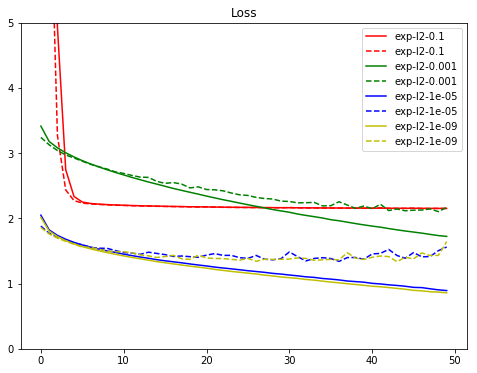

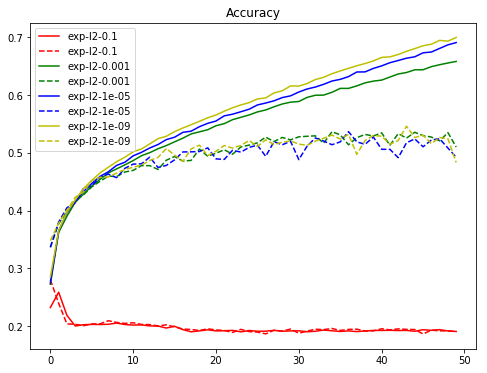

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()